# Implicit conjunction:  different predicates applied on a object (reference problem)

Generating sentences of the form

- 1) **c saw X running COMPLEMENT, c didn't saw X running** -- contradiction 
- 1) **c saw X driving COMPLEMENT, c didn't saw X driving** -- contradiction 


- 2) **c saw X running COMPLEMENT1, c didn't saw X running  COMPLEMENT2** -- non-contradiction
- 2) **c saw X driving COMPLEMENT1, c didn't saw X driving COMPLEMENT2** -- non-contradiction 

X = [name, a girl, a boy]

In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, color_list, city_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [3]:
for i in range(len(name_list)):
    name = get_new_item([], name_list)
    new_name = get_new_item([name], name_list)
    assert name != new_name and name in name_list and new_name in name_list

In [4]:
upper_bound = 11000 / 2

COMPLEMENT_runnig = ["from a parade car",
                     "from PERSON's car",
                      "from a COLOR car",
                      "from a COLOR bus",
                      "from a special recently built bus",
                      "from a COLOR school bus",
                      "from a bus going to CITY",
                      "from a COLOR bus with a new engine"]

COMPLEMENT_driving = ["a COLOR car",
                      "in CITY",
                      "PERSON's car",
                      "a COLOR bicicle",
                      "PERSON's bicicle",
                      "an eletric COLOR bicicle",
                      "PERSON's new Tesla Roadster"]

### Generating all types of sentences

- 1) **c saw X running COMPLEMENT, c didn't saw X running** -- contradiction 
- 1) **c saw X driving COMPLEMENT, c didn't saw X driving** -- contradiction 

In [5]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    object_list = [get_new_item([person1], name_list), "a girl", "a boy"]
    direct_object = get_new_item([], object_list)
    if i % 2 == 0:
        verb = "running"
        complement = get_new_item([], COMPLEMENT_runnig)
    else:
        verb = "driving"
        complement = get_new_item([], COMPLEMENT_driving)
    person2 = get_new_item([person1, direct_object], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement = complement.replace("PERSON's", person2 + "'s")
    complement = complement.replace("COLOR", color)
    complement = complement.replace("CITY", city)
    sentence = "{} saw {} {} {},{} didn't saw {} {}".format(person1,
                                                             direct_object,
                                                             verb,
                                                             complement,
                                                             person1,
                                                             direct_object,
                                                             verb)
    all_sentences_1.append(sentence)
    
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]


for sentence in all_sentences_1[0:10]:
    print(sentence)

['Geneva saw Dan running from a red bus with a new engine', "Geneva didn't saw Dan running", 1]
["Charlene saw a girl driving Rachel's car", "Charlene didn't saw a girl driving", 1]
['Gilbert saw a girl running from a mango car', "Gilbert didn't saw a girl running", 1]
["Joan saw Corey driving Kelly's new Tesla Roadster", "Joan didn't saw Corey driving", 1]
["Dwight saw a boy running from Tim's car", "Dwight didn't saw a boy running", 1]
['Monique saw Marguerite driving a blue car', "Monique didn't saw Marguerite driving", 1]
['Valerie saw a boy running from a lemon bus with a new engine', "Valerie didn't saw a boy running", 1]
['Patricia saw a girl driving an eletric mango bicicle', "Patricia didn't saw a girl driving", 1]
['Jessie saw a girl running from a mango school bus', "Jessie didn't saw a girl running", 1]
['Julia saw a boy driving an eletric red bicicle', "Julia didn't saw a boy driving", 1]


- 2) **c saw X running COMPLEMENT1, c didn't saw X running  COMPLEMENT2** -- non-contradiction
- 2) **c saw X driving COMPLEMENT1, c didn't saw X driving COMPLEMENT2** -- non-contradiction 

In [6]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person1 = get_new_item([], name_list)
    object_list = [get_new_item([person1], name_list), "a girl", "a boy"]
    direct_object = get_new_item([], object_list)
    if i % 2 == 0:
        verb = "running"
        COMPLEMENT = COMPLEMENT_runnig 
    else:
        verb = "driving"
        COMPLEMENT = COMPLEMENT_driving 
    
    complement1 = get_new_item([], COMPLEMENT)
    complement2 = get_new_item([complement1], COMPLEMENT)
    person2 = get_new_item([person1, direct_object], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement1 = complement1.replace("PERSON's", person2 + "'s")
    complement1 = complement1.replace("COLOR", color)
    complement1 = complement1.replace("CITY", city)
    person2 = get_new_item([person1, direct_object, person2], name_list)
    color = get_new_item([], color_list)
    city = get_new_item([], city_list)
    complement2 = complement2.replace("PERSON's", person2 + "'s")
    complement2 = complement2.replace("COLOR", color)
    complement2 = complement2.replace("CITY", city)
    sentence = "{} saw {} {} {}, {} didn't saw {} {} {}".format(person1,
                                                             direct_object,
                                                             verb,
                                                             complement1,
                                                             person1,
                                                             direct_object,
                                                             verb,
                                                             complement2)
    all_sentences_2.append(sentence)
    
all_sentences_2 = [sentence.split(",") + [0] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

['Pearl saw Bobbie running from a special recently built bus', " Pearl didn't saw Bobbie running from a purple bus", 0]
['Albert saw a boy driving a gray bicicle', " Albert didn't saw a boy driving in Baia Mare", 0]
['Blanche saw a girl running from a special recently built bus', " Blanche didn't saw a girl running from Ian's car", 0]
['Candice saw a girl driving an eletric white bicicle', " Candice didn't saw a girl driving a salmon car", 0]
["Theresa saw a boy running from Jorge's car", " Theresa didn't saw a boy running from a bus going to Tulcea", 0]
['Daisy saw a boy driving a mango car', " Daisy didn't saw a boy driving Frances's car", 0]
['Lynda saw Melanie running from a special recently built bus', " Lynda didn't saw Melanie running from Brandon's car", 0]
["Daryl saw a boy driving Jeremy's bicicle", " Daryl didn't saw a boy driving an eletric ashy bicicle", 0]
['Terry saw a girl running from a gray school bus', " Terry didn't saw a girl running from a special recently built b

In [7]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)

size1 = len(all_sentences_1)
size2 = len(all_sentences_2)

all_sentences = all_sentences_1 + all_sentences_2
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("total size = {}".format(size))

type 1 size = 5500
type 2 size = 5500
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [8]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Carolyn saw a boy driving a purple car,Carolyn didn't saw a boy driving,1
10996,Marc saw Reginald running from a white car,Marc didn't saw Reginald running,1
10997,Felicia saw a boy driving a ashy car,Felicia didn't saw a boy driving,1
10998,Philip saw a girl driving Rafael's new Tesla R...,Philip didn't saw a girl driving a purple bic...,0
10999,Ada saw a boy driving Marvin's bicicle,Ada didn't saw a boy driving a orange car,0


#### Looking at the label distribution

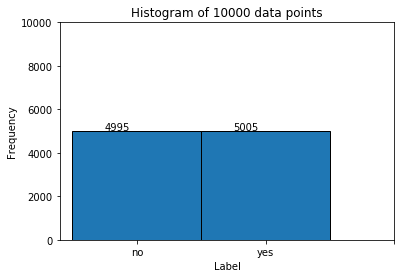

In [9]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b2_b_ii_train.png")

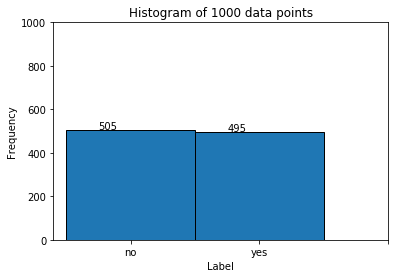

In [10]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b2_b_ii_test.png")

### Saving to CSV

In [11]:
df_train.to_csv("b2_b_ii_train.csv", index=False)
df_test.to_csv("b2_b_ii_test.csv", index=False)